In [1]:
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import seaborn as sns

In [2]:
# Define path to the data directory
train_path = Path('train/')
test_path = Path('test/')
val_path = Path('val/')

In [3]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_path / 'NORMAL'
pneumonia_cases_dir = train_path / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

In [4]:
# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

1    3875
0    1341
Name: label, dtype: int64


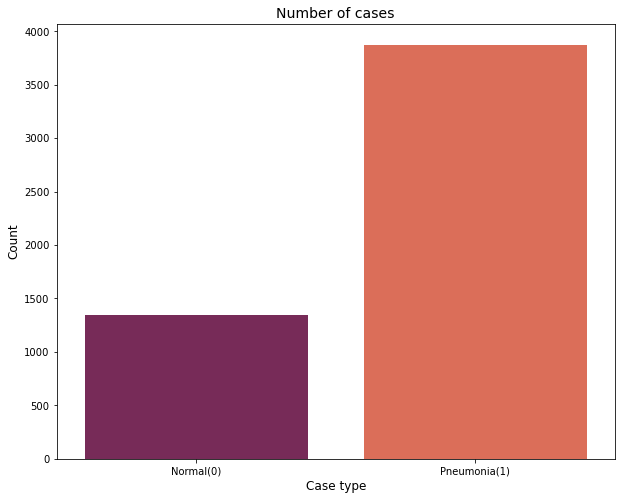

In [5]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values, palette="rocket")
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [6]:
# Distribution of the test datasets
n_normal = len(os.listdir(str(test_path) + '/NORMAL'))
n_infect = len(os.listdir(str(test_path) + '/PNEUMONIA'))
print('Set: Test, normal images: {}, pneumonia images: {}'.format(n_normal, n_infect))

# Distribution of the validation datasets
n_normal = len(os.listdir(str(val_path) + '/NORMAL'))
n_infect = len(os.listdir(str(val_path) + '/PNEUMONIA'))
print('Set: Valdiation, normal images: {}, pneumonia images: {}'.format(n_normal, n_infect))

Set: Test, normal images: 234, pneumonia images: 390
Set: Valdiation, normal images: 9, pneumonia images: 9


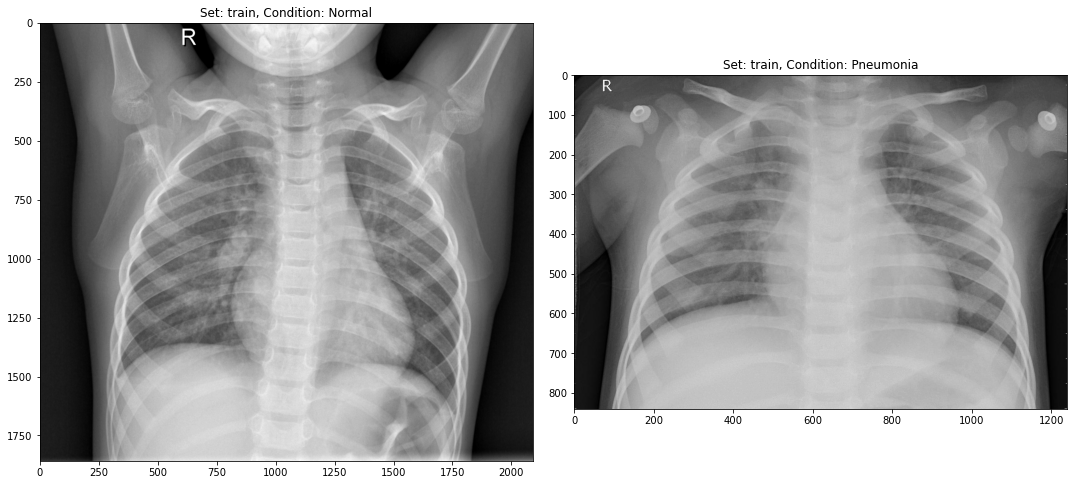

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

_set = 'train'
for i, _set in enumerate(['train']):
    ax[i].imshow(plt.imread(str(normal_cases_dir) + "\\" + "IM-0115-0001.jpeg"), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+1].imshow(plt.imread(str(pneumonia_cases_dir) + "\\" + "person1_bacteria_2.jpeg"), cmap='gray')
    ax[i+1].set_title('Set: {}, Condition: Pneumonia'.format(_set))